In [1]:
!pip install statsmodels

#Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Inspect data and import as pandas dataframe

In [3]:
%%sh
wc -l UNR-IDD.csv

   37412 UNR-IDD.csv


In [4]:
%%sh
head UNR-IDD.csv

Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Delta Packets Rx Dropped, Delta Packets Tx Dropped,Delta Packets Rx Errors,Delta Packets Tx Errors,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,0,0,0,280,2,5,0,0,0,0,1,0,0,0,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,0,146,5908166,5969,84,5,0,0,0,0,2,0,0,0,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,0,2,278,280,2,5,0,0,0,0,3,0,0,0,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
of:000000000

In [11]:
df = pd.read_csv("UNR-IDD.csv")

Inspect data

In [17]:
df.head(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [14]:
df.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [16]:
df.shape, df.dtypes

((37411, 34),
 Switch ID                        object
 Port Number                      object
 Received Packets                  int64
 Received Bytes                    int64
 Sent Bytes                        int64
 Sent Packets                      int64
 Port alive Duration (S)           int64
 Packets Rx Dropped                int64
 Packets Tx Dropped                int64
 Packets Rx Errors                 int64
 Packets Tx Errors                 int64
 Delta Received Packets            int64
 Delta Received Bytes              int64
 Delta Sent Bytes                  int64
 Delta Sent Packets                int64
 Delta Port alive Duration (S)     int64
 Delta Packets Rx Dropped          int64
  Delta Packets Tx Dropped         int64
 Delta Packets Rx Errors           int64
 Delta Packets Tx Errors           int64
 Connection Point                  int64
 Total Load/Rate                   int64
 Total Load/Latest                 int64
 Unknown Load/Rate                 int64
 U

In [35]:
col_names = [name for name in df.dtypes.index]
dtypes = [dtype for dtype in df.dtypes.tolist()]

numeric_features = [name for name, dtype in zip(col_names, dtypes) if dtype == 'int64']

categorical_features = [name for name, dtype in zip(col_names, dtypes) if dtype != 'int64']
df[numeric_features].describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
count,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000,...,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,3.741100e+04,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.0
mean,21618.897169,2.647491e+07,2.451212e+07,33626.824009,911.096415,0.0,0.0,0.0,0.0,194.958087,...,1.921455e+04,5.145597e+05,1.921455e+04,5.145597e+05,1.921455e+04,0.0,88.690572,1.008636e+05,1.007444e+05,-1.0
std,65283.170126,3.703044e+07,3.439876e+07,88792.970378,982.113446,0.0,0.0,0.0,0.0,1087.140797,...,1.107441e+05,1.863403e+06,1.107441e+05,1.863403e+06,1.107441e+05,0.0,790.715343,2.350297e+05,2.350284e+05,0.0
min,9.000000,7.860000e+02,5.705000e+03,41.000000,26.000000,0.0,0.0,0.0,0.0,0.000000,...,-1.284277e+06,0.000000e+00,-1.284277e+06,0.000000e+00,-1.284277e+06,0.0,4.000000,8.700000e+01,3.700000e+01,-1.0
25%,329.000000,9.104050e+04,5.775950e+04,347.000000,136.000000,0.0,0.0,0.0,0.0,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000,2.367000e+03,2.272000e+03,-1.0
50%,1170.000000,1.263052e+07,1.262658e+07,1240.000000,259.000000,0.0,0.0,0.0,0.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.000000,7.472000e+03,7.349000e+03,-1.0
75%,3417.000000,3.783230e+07,3.176443e+07,3968.000000,1747.000000,0.0,0.0,0.0,0.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,8.000000,2.343700e+04,2.322000e+04,-1.0
max,352772.000000,2.715925e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,15695.000000,...,2.004388e+06,2.606759e+07,2.004388e+06,2.606759e+07,2.004388e+06,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0


In [36]:
numeric_features, categorical_features

(['Received Packets',
  'Received Bytes',
  'Sent Bytes',
  'Sent Packets',
  'Port alive Duration (S)',
  'Packets Rx Dropped',
  'Packets Tx Dropped',
  'Packets Rx Errors',
  'Packets Tx Errors',
  'Delta Received Packets',
  'Delta Received Bytes',
  'Delta Sent Bytes',
  'Delta Sent Packets',
  'Delta Port alive Duration (S)',
  'Delta Packets Rx Dropped',
  ' Delta Packets Tx Dropped',
  'Delta Packets Rx Errors',
  'Delta Packets Tx Errors',
  'Connection Point',
  'Total Load/Rate',
  'Total Load/Latest',
  'Unknown Load/Rate',
  'Unknown Load/Latest',
  'Latest bytes counter',
  'Table ID',
  'Active Flow Entries',
  'Packets Looked Up',
  'Packets Matched',
  'Max Size'],
 ['Switch ID', 'Port Number', 'is_valid', 'Label', 'Binary Label'])

In [19]:
df.sample(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
26091,of:000000000000000c,Port#:2,6367,164015628,119568300,414552,2767,0,0,0,...,0,0,True,0,8,671495,671358,-1,Normal,Normal
29048,of:0000000000000009,Port#:1,1691,25296990,6334587,410,286,0,0,0,...,0,0,True,0,6,146934,146816,-1,PortScan,Attack
29060,of:000000000000000b,Port#:2,65,9076,9076,65,56,0,0,0,...,0,0,True,0,4,137,76,-1,PortScan,Attack
34392,of:0000000000000002,Port#:1,190,6304677,17177,189,51,0,0,0,...,0,0,True,0,6,427,371,-1,PortScan,Attack
10970,of:000000000000000c,Port#:4,3728,50683850,12810378,1899,2096,0,0,0,...,0,0,True,0,7,14641,14507,-1,Blackhole,Attack


create a train and test sets from data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test =  train_test_split(df, train_size=0.8, random_state= 42)

In [32]:
print('Original set  ---> ',df.shape,
      '\nTraining set  ---> ',df_train.shape,
      '\nTesting set   ---> ', df_test.shape)

Original set  --->  (37411, 34) 
Training set  --->  (29928, 34) 
Testing set   --->  (7483, 34)


In [20]:
df.isna().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

In [28]:
df[["Switch ID", "Port Number", "is_valid", "Binary Label", "Label"]].describe()

,Switch ID,Port Number,is_valid,Binary Label,Label
count,37411,37411,37411,37411,37411
unique,12,4,1,2,6
top,of:000000000000000c,Port#:1,True,Attack,PortScan
freq,5490,11903,37411,33638,9500


In [33]:
df_train[["Switch ID", "Port Number", "is_valid", "Binary Label", "Label"]].describe()

,Switch ID,Port Number,is_valid,Binary Label,Label
count,29928,29928,29928,29928,29928
unique,12,4,1,2,6
top,of:000000000000000c,Port#:1,True,Attack,PortScan
freq,4424,9532,29928,26871,7575


In [37]:
df_train[categorical_features].describe()

,Switch ID,Port Number,is_valid,Label,Binary Label
count,29928,29928,29928,29928,29928
unique,12,4,1,6,2
top,of:000000000000000c,Port#:1,True,PortScan,Attack
freq,4424,9532,29928,7575,26871


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29928 entries, 5472 to 15795
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      29928 non-null  object
 1   Port Number                    29928 non-null  object
 2   Received Packets               29928 non-null  int64 
 3   Received Bytes                 29928 non-null  int64 
 4   Sent Bytes                     29928 non-null  int64 
 5   Sent Packets                   29928 non-null  int64 
 6   Port alive Duration (S)        29928 non-null  int64 
 7   Packets Rx Dropped             29928 non-null  int64 
 8   Packets Tx Dropped             29928 non-null  int64 
 9   Packets Rx Errors              29928 non-null  int64 
 10  Packets Tx Errors              29928 non-null  int64 
 11  Delta Received Packets         29928 non-null  int64 
 12  Delta Received Bytes           29928 non-null  int64 
 13

Perform basic EDA on data

/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == -1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singu

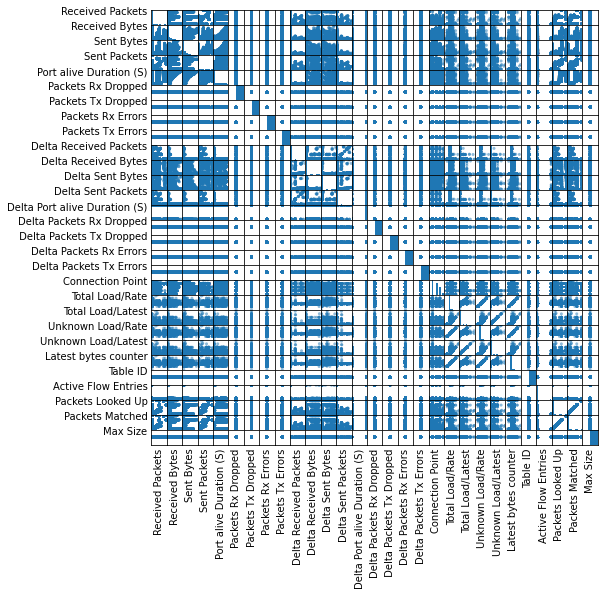

In [38]:
numeric_data = df[numeric_features]

axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n - 1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

too many columns.  Identify and eliminate columns with no relevant data .

In [80]:
columns_to_check = ["Packets Rx Dropped","Packets Tx Dropped",\
                    "Packets Rx Errors","Packets Tx Errors",\
                    "Delta Received Packets","Delta Received Bytes",\
                    "Delta Sent Bytes","Delta Sent Packets",\
                    "Delta Port alive Duration (S)","Delta Packets Rx Dropped",\
                    " Delta Packets Tx Dropped","Delta Packets Rx Errors",\
                    "Delta Packets Tx Errors","Connection Point"]



In [81]:
df[columns_to_check].describe()

,Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Delta Packets Rx Dropped,Delta Packets Tx Dropped,Delta Packets Rx Errors,Delta Packets Tx Errors,Connection Point
count,37411.0,37411.0,37411.0,37411.0,37411.000000,3.741100e+04,3.741100e+04,37411.000000,37411.000000,37411.0,37411.0,37411.0,37411.0,37411.000000
mean,0.0,0.0,0.0,0.0,194.958087,3.427001e+05,3.145126e+05,178.083264,4.842934,0.0,0.0,0.0,0.0,2.437839
std,0.0,0.0,0.0,0.0,1087.140797,1.203131e+06,1.154213e+06,1032.533005,0.363868,0.0,0.0,0.0,0.0,1.149994
min,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,0.0,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,0.0,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,0.0,0.0,0.0,0.0,1.000000
50%,0.0,0.0,0.0,0.0,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,0.0,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,0.0,6.000000,8.030000e+02,7.590000e+02,5.000000,5.000000,0.0,0.0,0.0,0.0,3.000000
max,0.0,0.0,0.0,0.0,15695.000000,6.647966e+06,6.647970e+06,15659.000000,5.000000,0.0,0.0,0.0,0.0,5.000000


In [82]:
columns_to_drop = ["Packets Rx Dropped","Packets Tx Dropped",\
                    "Packets Rx Errors","Packets Tx Errors",\
                    "Delta Packets Rx Dropped",\
                    " Delta Packets Tx Dropped","Delta Packets Rx Errors",\
                    "Delta Packets Tx Errors", \
                   "Table ID", "Max Size" , "is_valid" ]

In [83]:
columns_to_drop

['Packets Rx Dropped',
 'Packets Tx Dropped',
 'Packets Rx Errors',
 'Packets Tx Errors',
 'Delta Packets Rx Dropped',
 ' Delta Packets Tx Dropped',
 'Delta Packets Rx Errors',
 'Delta Packets Tx Errors',
 'Table ID',
 'Max Size',
 'is_valid']

###create r (for reduced) sets

In [58]:
dfr_train = df_train.drop(columns = columns_to_drop)
dfr_train.head(5)

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
5472,of:0000000000000003,Port#:3,104,13967,13757,99,106,4,556,556,...,0,0,0,0,0,6,906,820,TCP-SYN,Attack
17981,of:0000000000000004,Port#:3,5779,101133607,12792441,1901,1762,4,556,556,...,0,0,0,0,0,5,15106,14880,Diversion,Attack
22521,of:0000000000000003,Port#:3,1523,19034821,25370201,2167,1252,2,278,556,...,0,0,0,0,0,6,10278,10077,Diversion,Attack
5576,of:0000000000000005,Port#:3,2226,6423562,15803,120,126,100,5570,278,...,0,0,0,0,0,8,7253,7157,TCP-SYN,Attack
35637,of:0000000000000003,Port#:3,107,14319,6317609,277,111,2,278,278,...,0,0,0,0,0,4,1202,1104,PortScan,Attack


In [59]:
colr_train_names = [name for name in dfr_train.dtypes.index]
dtypes = [dtype for dtype in dfr_train.dtypes.tolist()]

r_numeric_features = [name for name, dtype in zip(colr_train_names, dtypes) if dtype == 'int64']
r_categorical_features = [name for name, dtype in zip(colr_train_names, dtypes) if dtype != 'int64']

r_numeric_features, r_categorical_features

(['Received Packets',
  'Received Bytes',
  'Sent Bytes',
  'Sent Packets',
  'Port alive Duration (S)',
  'Delta Received Packets',
  'Delta Received Bytes',
  'Delta Sent Bytes',
  'Delta Sent Packets',
  'Delta Port alive Duration (S)',
  'Connection Point',
  'Total Load/Rate',
  'Total Load/Latest',
  'Unknown Load/Rate',
  'Unknown Load/Latest',
  'Latest bytes counter',
  'Active Flow Entries',
  'Packets Looked Up',
  'Packets Matched'],
 ['Switch ID', 'Port Number', 'Label', 'Binary Label'])

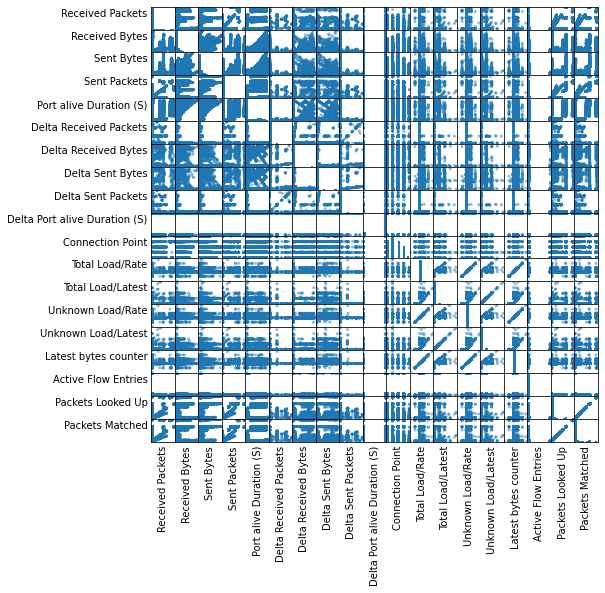

In [60]:
r_numeric_data = dfr_train[r_numeric_features]

axs = pd.plotting.scatter_matrix(r_numeric_data, figsize=(8, 8));
n = len(r_numeric_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n - 1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [88]:
###check a correlation matrix to identify columns that do not supply additonal information


In [63]:
corr2 = dfr_train.corr()
corr2

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
Received Packets,1.000000,0.240680,0.264020,0.587189,0.202520,0.176291,0.010660,-0.001111,0.086916,-0.066203,0.144032,0.017221,0.031571,0.017221,0.031571,0.017221,-0.032850,0.740243,0.740243
Received Bytes,0.240680,1.000000,0.680672,0.399659,0.752315,-0.042292,0.095085,0.004993,-0.062438,-0.017170,0.110046,0.016709,0.003188,0.016709,0.003188,0.016709,-0.033577,0.384352,0.384263
Sent Bytes,0.264020,0.680672,1.000000,0.493638,0.742717,-0.072439,0.006011,0.084779,-0.038878,-0.025927,0.038332,0.030101,0.030340,0.030101,0.030340,0.030101,-0.033012,0.452940,0.452863
Sent Packets,0.587189,0.399659,0.493638,1.000000,0.292719,0.032793,0.010117,0.017382,0.101894,-0.094248,-0.036001,0.017835,0.024284,0.017835,0.024284,0.017835,-0.037932,0.936336,0.936335
Port alive Duration (S),0.202520,0.752315,0.742717,0.292719,1.000000,-0.124244,0.009878,0.006822,-0.117037,0.004901,0.158674,0.000521,-0.027095,0.000521,-0.027095,0.000521,-0.032083,0.288102,0.287988
Delta Received Packets,0.176291,-0.042292,-0.072439,0.032793,-0.124244,1.000000,0.101234,0.034035,0.602926,0.009297,0.001797,-0.015450,-0.020478,-0.015450,-0.020478,-0.015450,-0.016979,0.043900,0.043915
Delta Received Bytes,0.010660,0.095085,0.006011,0.010117,0.009878,0.101234,1.000000,-0.070379,0.035750,0.003869,0.009510,0.004423,-0.004084,0.004423,-0.004084,0.004423,-0.008808,0.007678,0.007676
Delta Sent Bytes,-0.001111,0.004993,0.084779,0.017382,0.006822,0.034035,-0.070379,1.000000,0.104521,0.006389,-0.026193,0.275802,0.201785,0.275802,0.201785,0.275802,-0.009201,0.003987,0.003988
Delta Sent Packets,0.086916,-0.062438,-0.038878,0.101894,-0.117037,0.602926,0.035750,0.104521,1.000000,0.010844,-0.029979,-0.010563,-0.015595,-0.010563,-0.015595,-0.010563,-0.015875,0.040703,0.040718
Delta Port alive Duration (S),-0.066203,-0.017170,-0.025927,-0.094248,0.004901,0.009297,0.003869,0.006389,0.010844,1.000000,-0.002532,-0.001777,-0.002997,-0.001777,-0.002997,-0.001777,-0.037074,-0.093555,-0.093561


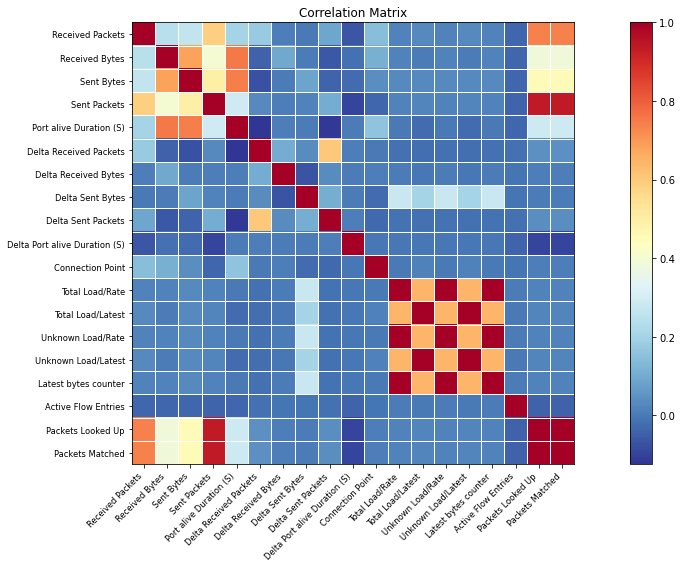

In [77]:
sm.graphics.plot_corr(corr2, xnames=list(corr2.columns))

plt.rc("figure", figsize=(16, 18))
plt.show()